<a href="https://colab.research.google.com/github/NemethJan/desktop-tutorial/blob/main/SpeicherSee_Time_Series_Modeling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose



In [ ]:
gletscher = pd.read_csv="https://doi.glamos.ch/data/volumechange/volumechange.csv"
gletscher

'https://doi.glamos.ch/data/volumechange/volumechange.csv'


** Step 1 Load the Data and Observe**




In [ ]:
Fuellstand = pd.read_csv ("https://www.uvek-gis.admin.ch/BFE/ogd/17/ogd17_fuellungsgrad_speicherseen.csv")
Fuellstand.describe()

,Wallis_speicherinhalt_gwh,Graubuenden_speicherinhalt_gwh,Tessin_speicherinhalt_gwh,UebrigCH_speicherinhalt_gwh,TotalCH_speicherinhalt_gwh,Wallis_max_speicherinhalt_gwh,Graubuenden_max_speicherinhalt_gwh,Tessin_max_speicherinhalt_gwh,UebrigCH_max_speicherinhalt_gwh,TotalCH_max_speicherinhalt_gwh
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,2009.392308,1113.684615,656.270000,949.975385,4729.322308,3921.703846,1970.003846,1231.134615,1598.757692,8721.600000
std,1138.863873,511.938058,315.189709,346.349547,2253.335573,130.128884,13.291166,9.306245,4.286566,144.520316
min,168.000000,99.000000,49.000000,215.000000,703.000000,3720.000000,1905.000000,1220.000000,1590.000000,8500.000000
25%,928.000000,641.750000,365.250000,632.500000,2587.250000,3775.000000,1960.000000,1225.000000,1595.000000,8560.000000
50%,2051.500000,1215.500000,695.500000,998.000000,4981.000000,3980.000000,1975.000000,1225.000000,1600.000000,8780.000000
75%,3144.500000,1581.250000,953.000000,1264.500000,6905.250000,4030.000000,1980.000000,1240.000000,1600.000000,8850.000000
max,3726.000000,1922.000000,1188.000000,1529.000000,8231.000000,4075.000000,1985.000000,1245.000000,1620.000000,8900.000000


***Step 2 Make a Tessin Dataset ***


In [ ]:
Fuellstand_Tessin = Fuellstand[["Datum", "Tessin_speicherinhalt_gwh", "Tessin_max_speicherinhalt_gwh", "TotalCH_max_speicherinhalt_gwh"  ]]
Fuellstand_Tessin

,Datum,Tessin_speicherinhalt_gwh,Tessin_max_speicherinhalt_gwh,TotalCH_max_speicherinhalt_gwh
0,2000-01-03,758,1225,8500
1,2000-01-10,720,1225,8500
2,2000-01-17,651,1225,8500
3,2000-01-24,591,1225,8500
4,2000-01-31,517,1225,8500
...,...,...,...,...
1295,2024-10-28,1126,1245,8900
1296,2024-11-04,1121,1245,8900
1297,2024-11-11,1050,1245,8900
1298,2024-11-18,977,1245,8900


***Step 3 Oberserve the Data ***

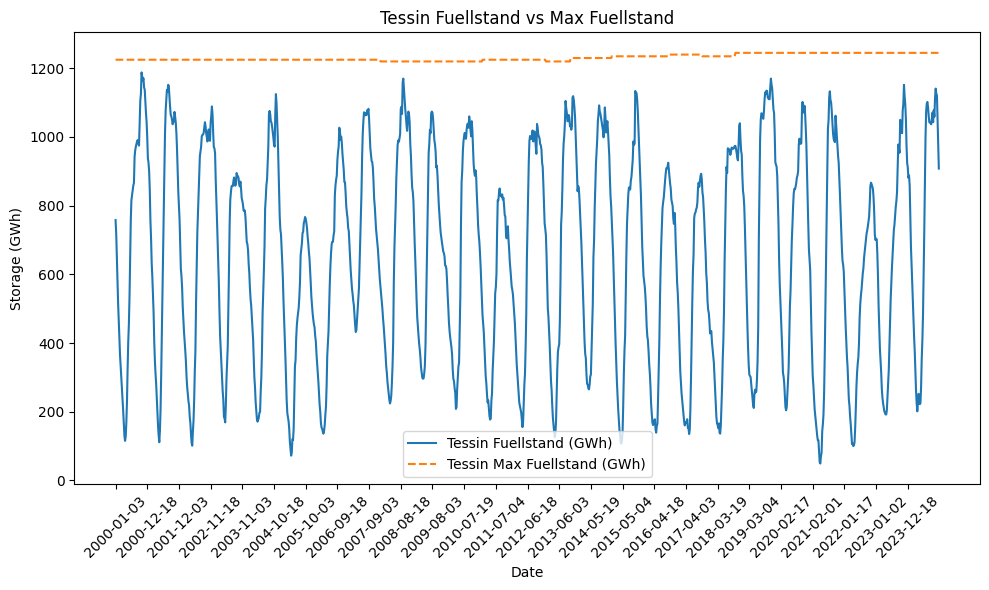

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(Fuellstand_Tessin['Datum'], Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], label='Tessin Fuellstand (GWh)')
plt.plot(Fuellstand_Tessin['Datum'], Fuellstand_Tessin['Tessin_max_speicherinhalt_gwh'], label='Tessin Max Fuellstand (GWh)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Storage (GWh)')
plt.title('Tessin Fuellstand vs Max Fuellstand')

# Adjust x-axis labels to display every N-th date (e.g., every 50th date)
plt.xticks(Fuellstand_Tessin['Datum'][::50], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

**Step 4 Decompose the Data**

It seems there is a big trend seasonal component
- Assumption Fuellstand in Summer High (low energy consumption) fuellstand in Winter low (high energy consumption)
- Maybe also a trend component


<ipython-input-5-aecc8b37241a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fuellstand_Tessin['Datum'] = pd.to_datetime(Fuellstand_Tessin['Datum'])  # Ensure 'Datum' is datetime


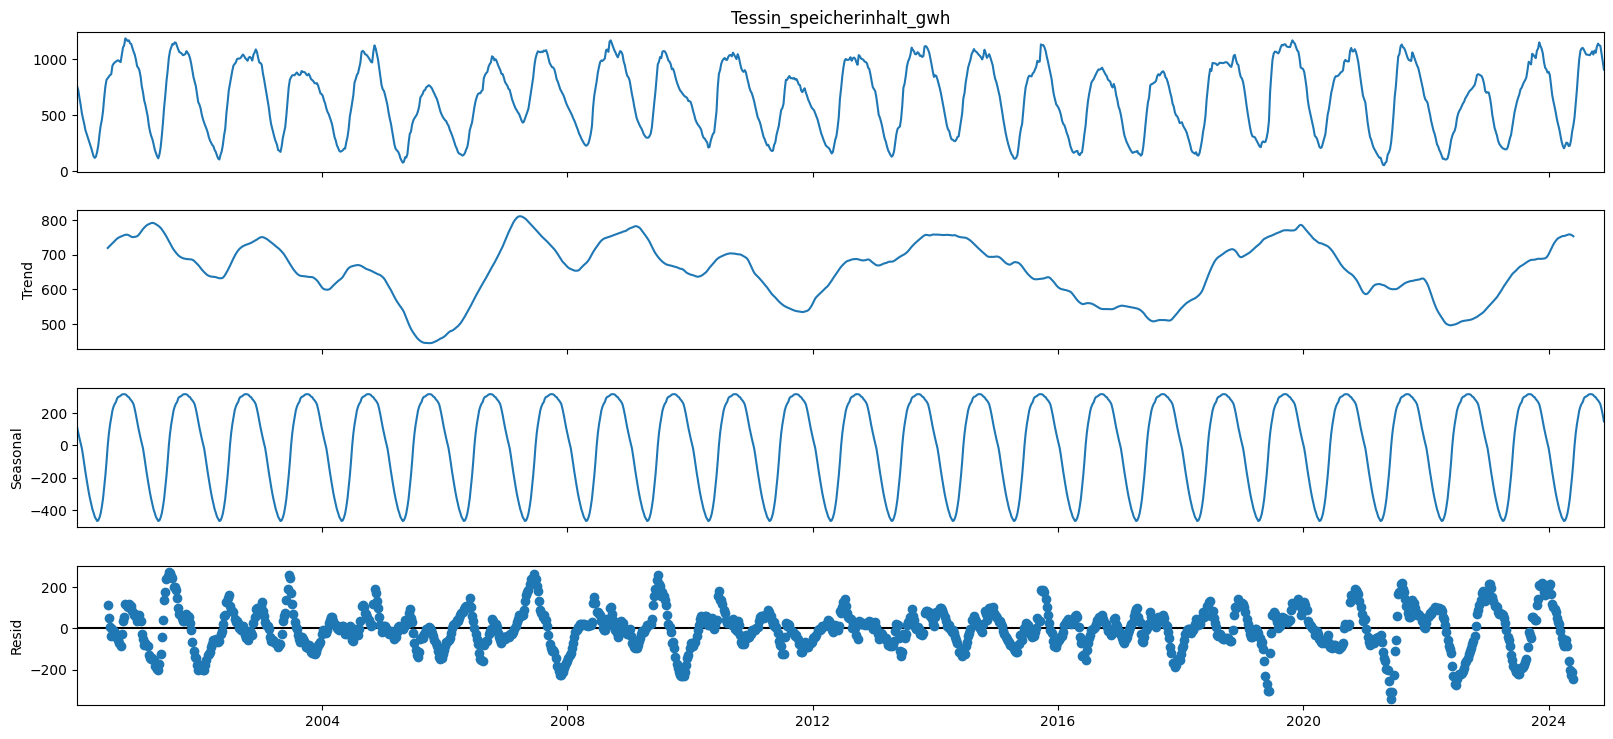

In [ ]:
# Ensure the index is the 'Datum' column
Fuellstand_Tessin['Datum'] = pd.to_datetime(Fuellstand_Tessin['Datum'])  # Ensure 'Datum' is datetime
Fuellstand_Tessin.set_index('Datum', inplace=True)  # Set 'Datum' as the index

# Decompose the time series for weekly data
# The period is set to 52 weeks (for yearly seasonality)
result = seasonal_decompose(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], model='additive', period=52)

# Plot the decomposition results
fig = result.plot()
fig.set_size_inches(18, 8)
plt.show()

We can see that the data set is non-stationary and has strong seasonal components.


**Step 5 Differencing and ADF Test  **

To adjust for this facts we difference the trend component to make the dataset stationary. We apply the ADF thest to see if that has worked

<ipython-input-6-6f586ed18e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fuellstand_Tessin['differenced'] = Fuellstand_Tessin['Tessin_speicherinhalt_gwh'].diff().dropna()


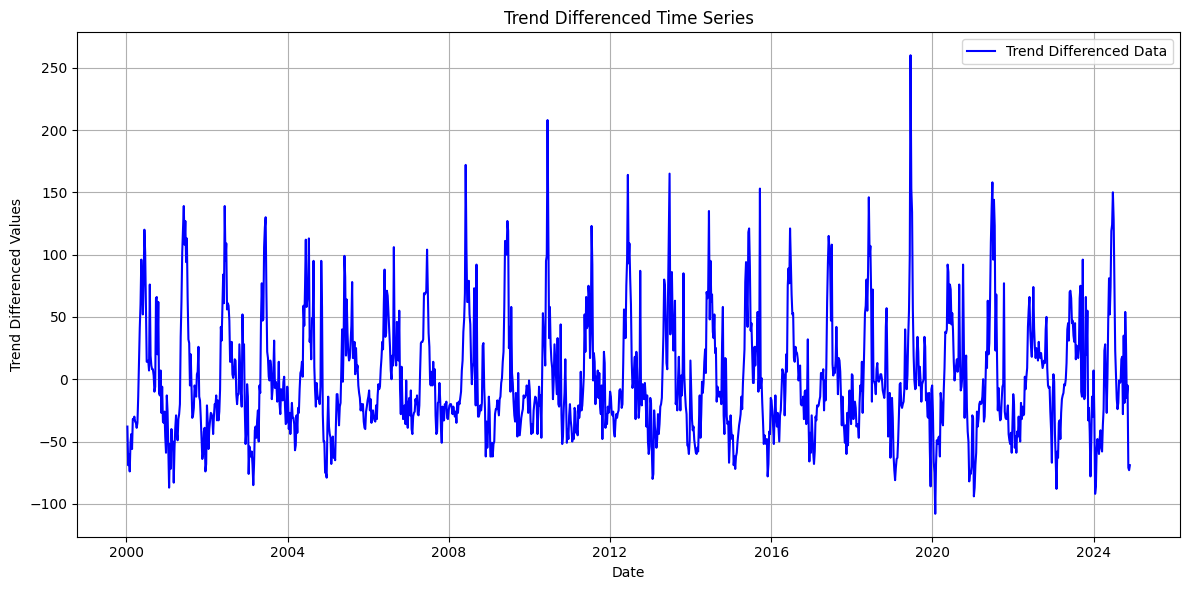

In [ ]:

# First, apply differencing (difference once) to remove trend
Fuellstand_Tessin['differenced'] = Fuellstand_Tessin['Tessin_speicherinhalt_gwh'].diff().dropna()

# Plot the seasonal differenced data
plt.figure(figsize=(12, 6))
plt.plot(Fuellstand_Tessin['differenced'], label="Trend Differenced Data", color="blue")
plt.title("Trend Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Trend Differenced Values")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -11.362116933116855
p-value: 9.417624513217416e-21


In [ ]:
# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(Fuellstand_Tessin['differenced'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -11.672091293140939
p-value: 1.824524138410535e-21


The ADF is rejected (indicates non stationary data) but we further difference to get rid of seasonality

p is smaller than 0.05 so the Null Hypothesis can be rejected the data is stationary  

<ipython-input-8-2fd69fd50f6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fuellstand_Tessin.loc[:, 'seasonal_differenced'] = Fuellstand_Tessin['differenced'].diff(periods=seasonal_lag).dropna()


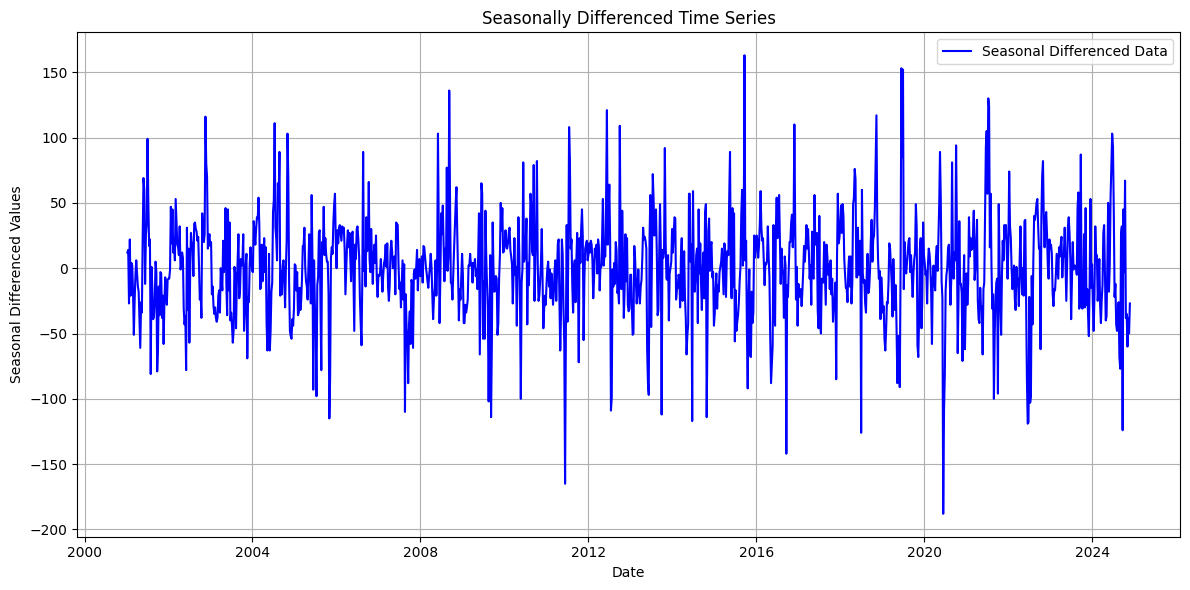

In [ ]:
#Should we difference away the seasonality altough our time series is stationary

seasonal_lag = 52  # Adjust based on your seasonality (e.g., 52 weeks for yearly)
Fuellstand_Tessin.loc[:, 'seasonal_differenced'] = Fuellstand_Tessin['differenced'].diff(periods=seasonal_lag).dropna()


# Plot the seasonal differenced data
plt.figure(figsize=(12, 6))
plt.plot(Fuellstand_Tessin['seasonal_differenced'], label="Seasonal Differenced Data", color="blue")
plt.title("Seasonally Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Seasonal Differenced Values")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(Fuellstand_Tessin['seasonal_differenced'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -12.08941767683066
p-value: 2.139739869672538e-22


**Step 6**
Plot ACF and PACF




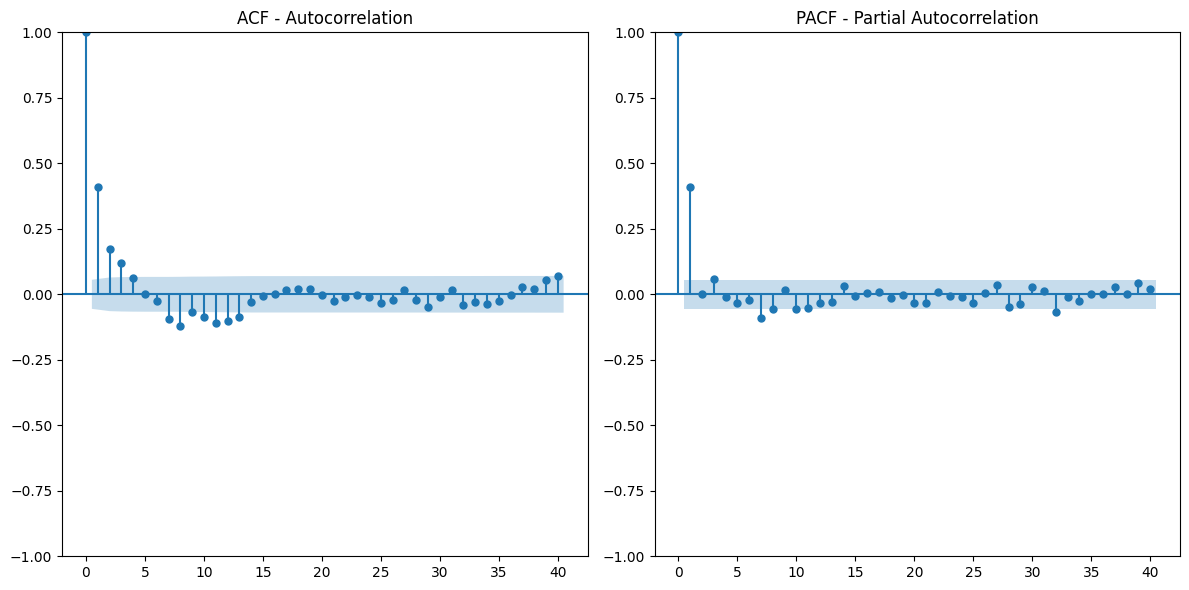

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# ACF Plot
plot_acf(Fuellstand_Tessin['seasonal_differenced'].dropna(), lags=40, ax=ax[0])
ax[0].set_title('ACF - Autocorrelation')

# PACF Plot
plot_pacf(Fuellstand_Tessin['seasonal_differenced'].dropna(), lags=40, ax=ax[1])
ax[1].set_title('PACF - Partial Autocorrelation')

plt.tight_layout()
plt.show()

According to our golden table (Notebook 201)

Indicates the followng
	1.	AR Terms:
1 or 2 AR terms (based on PACF spikes).
	2.	MA Terms:
1 or 2 MA terms (based on ACF spikes).


Step 7
Fit ARIMA Models




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Tessin_speicherinhalt_gwh   No. Observations:                 1300
Model:                        ARIMA(1, 0, 1)   Log Likelihood               -6464.514
Date:                       Wed, 27 Nov 2024   AIC                          12937.027
Time:                               08:16:03   BIC                          12957.708
Sample:                           01-03-2000   HQIC                         12944.787
                                - 11-25-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.2709    110.994      5.913      0.000     438.728     873.814
ar.L1          0.9830      0.006    174.176      0.000       0.972       0.

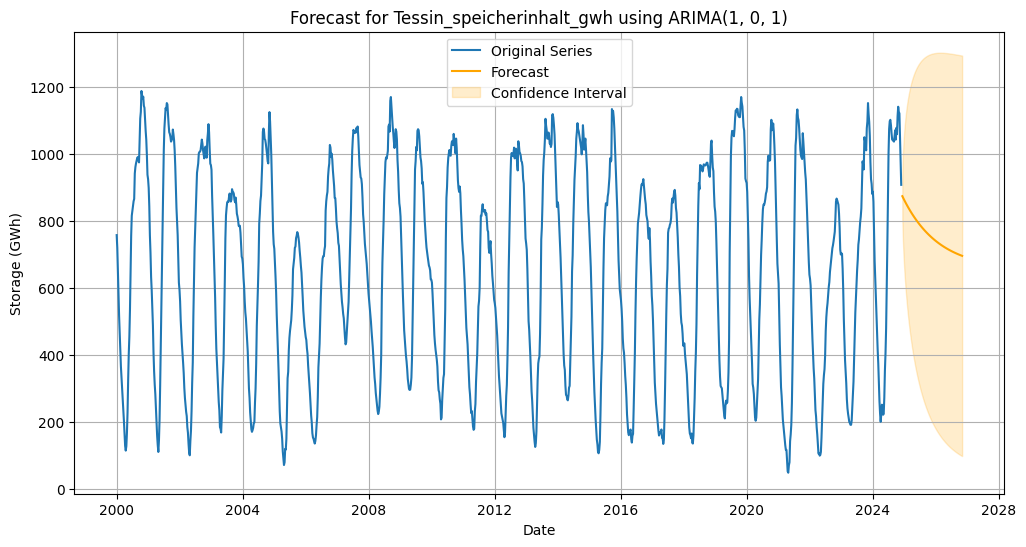

In [ ]:
#ARIMA(1,0,1)

model = ARIMA(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], order=(1, 0, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecasting
forecast_horizon = 100  # Forecast 100 steps ahead
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original series and forecast
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(Fuellstand_Tessin.index, Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], label="Original Series")

# Plot forecast
forecast_index = pd.date_range(start=Fuellstand_Tessin.index[-1], periods=forecast_horizon + 1, freq="W")[1:]
plt.plot(forecast_index, forecast_values, color="orange", label="Forecast")

# Plot confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="orange", alpha=0.2, label="Confidence Interval")

# Add labels and legend
plt.title("Forecast for Tessin_speicherinhalt_gwh using ARIMA(1, 0, 1)")
plt.xlabel("Date")
plt.ylabel("Storage (GWh)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Tessin_speicherinhalt_gwh   No. Observations:                 1300
Model:                        ARIMA(2, 0, 1)   Log Likelihood               -6127.782
Date:                       Wed, 27 Nov 2024   AIC                          12265.565
Time:                               08:16:19   BIC                          12291.415
Sample:                           01-03-2000   HQIC                         12275.264
                                - 11-25-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.2702     33.375     19.663      0.000     590.856     721.684
ar.L1          1.8900      0.013    141.062      0.000       1.864       1.

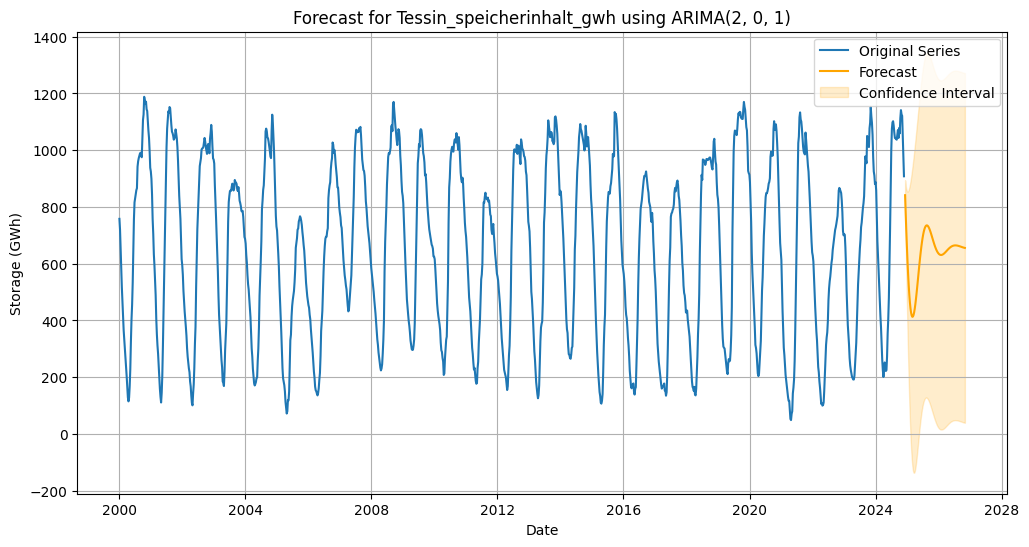

In [ ]:
#ARIMA(2,0,1)

model = ARIMA(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], order=(2, 0, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecasting
forecast_horizon = 100  # Forecast 100 steps ahead
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original series and forecast
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(Fuellstand_Tessin.index, Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], label="Original Series")

# Plot forecast
forecast_index = pd.date_range(start=Fuellstand_Tessin.index[-1], periods=forecast_horizon + 1, freq="W")[1:]
plt.plot(forecast_index, forecast_values, color="orange", label="Forecast")

# Plot confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="orange", alpha=0.2, label="Confidence Interval")

# Add labels and legend
plt.title("Forecast for Tessin_speicherinhalt_gwh using ARIMA(2, 0, 1)")
plt.xlabel("Date")
plt.ylabel("Storage (GWh)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Tessin_speicherinhalt_gwh   No. Observations:                 1299
Model:                        ARIMA(1, 0, 2)   Log Likelihood               -6335.753
Date:                       Sun, 24 Nov 2024   AIC                          12681.506
Time:                               17:38:04   BIC                          12707.352
Sample:                           01-03-2000   HQIC                         12691.204
                                - 11-18-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.0778     96.484      6.800      0.000     466.973     845.183
ar.L1          0.9767      0.006    151.163      0.000       0.964       0.

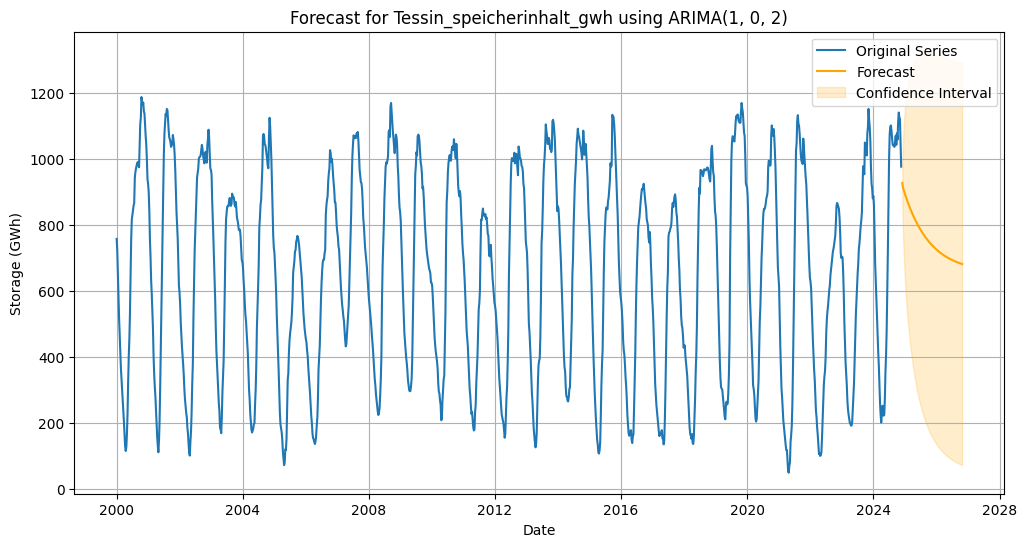

In [ ]:
#ARIMA(2,0,1)

model = ARIMA(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], order=(1, 0, 2))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecasting
forecast_horizon = 100  # Forecast 100 steps ahead
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original series and forecast
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(Fuellstand_Tessin.index, Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], label="Original Series")

# Plot forecast
forecast_index = pd.date_range(start=Fuellstand_Tessin.index[-1], periods=forecast_horizon + 1, freq="W")[1:]
plt.plot(forecast_index, forecast_values, color="orange", label="Forecast")

# Plot confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="orange", alpha=0.2, label="Confidence Interval")

# Add labels and legend
plt.title("Forecast for Tessin_speicherinhalt_gwh using ARIMA(1, 0, 2)")
plt.xlabel("Date")
plt.ylabel("Storage (GWh)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                   
Dep. Variable:     Tessin_speicherinhalt_gwh   No. Observations:                 1299
Model:                        ARIMA(2, 0, 2)   Log Likelihood               -6107.656
Date:                       Sun, 24 Nov 2024   AIC                          12227.312
Time:                               17:41:24   BIC                          12258.328
Sample:                           01-03-2000   HQIC                         12238.950
                                - 11-18-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.0767     25.975     25.258      0.000     605.168     706.986
ar.L1          1.9321      0.011    169.358      0.000       1.910       1.

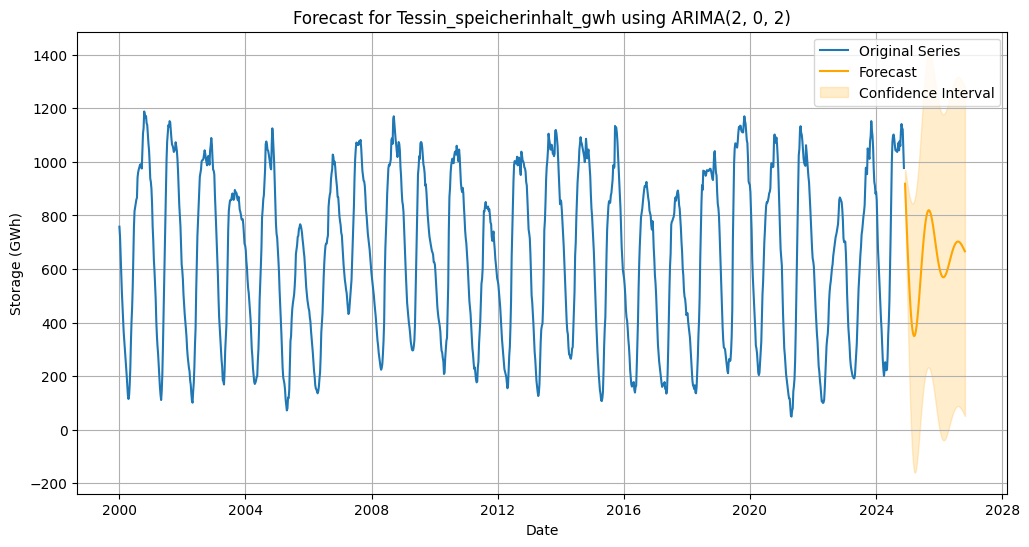

In [ ]:
#ARIMA(2,0,2)

model = ARIMA(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], order=(2, 0, 2))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecasting
forecast_horizon = 100  # Forecast 100 steps ahead
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original series and forecast
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(Fuellstand_Tessin.index, Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], label="Original Series")

# Plot forecast
forecast_index = pd.date_range(start=Fuellstand_Tessin.index[-1], periods=forecast_horizon + 1, freq="W")[1:]
plt.plot(forecast_index, forecast_values, color="orange", label="Forecast")

# Plot confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="orange", alpha=0.2, label="Confidence Interval")

# Add labels and legend
plt.title("Forecast for Tessin_speicherinhalt_gwh using ARIMA(2, 0, 2)")
plt.xlabel("Date")
plt.ylabel("Storage (GWh)")
plt.legend()
plt.grid()
plt.show()


Approach B:
- Alternative step with cross validation using expanding window method
- Cross validation for each model to find AR
- Plotting the different MSEs

We have to be cautious for cross validation in a time series modeling context so we use expanding time series cross validation because our data depends on historical daa

In [ ]:
 Fuellstand_Tessin.index.freq = 'W-MON'

# Assuming 'Fuellstand_Tessin' is your DataFrame and 'Tessin_speicherinhalt_gwh' is the column of interest
series = Fuellstand_Tessin['Tessin_speicherinhalt_gwh']

# Initialize parameters
initial_train_size = 750
test_window_size = 50
n_iterations = 5  # Number of expanding steps
ar_order_range = range(1, 11)  # ARIMA(p, 0, 0) orders to test

# Create a DataFrame to store results
results = pd.DataFrame(np.zeros((1, len(ar_order_range))))
results.columns = ar_order_range

# Expanding cross-validation
for iteration in range(n_iterations):
    # Define training and testing sets
    train_end = initial_train_size + test_window_size * iteration
    test_end = train_end + test_window_size
    training = series[:train_end]
    testing = series[train_end:test_end]

    # Loop through AR orders
    for p in ar_order_range:
        try:
            # Fit ARIMA(p, 0, 0) model
            model = ARIMA(training, order=(p, 0, 0))
            model_fit = model.fit()

            # Forecast
            forecast = model_fit.forecast(steps=test_window_size)

            # Compute MSE for this iteration and AR order
            mse = ((testing.values - forecast.values)**2).mean()
            results.loc[0, p] += mse
        except Exception as e:
            print(f"Error for AR({p}): {e}")

# Average the MSE across iterations
results = results / n_iterations

# Display results
print("Mean Squared Error (MSE) for each AR order:")
print(results)

Mean Squared Error (MSE) for each AR order:
              1             2             3            4             5   \
0  216548.060933  78186.843804  62607.240334  47615.77231  39835.790127   

            6             7             8             9             10  
0  37318.81912  35613.303095  34333.780501  35474.854775  31036.167008  


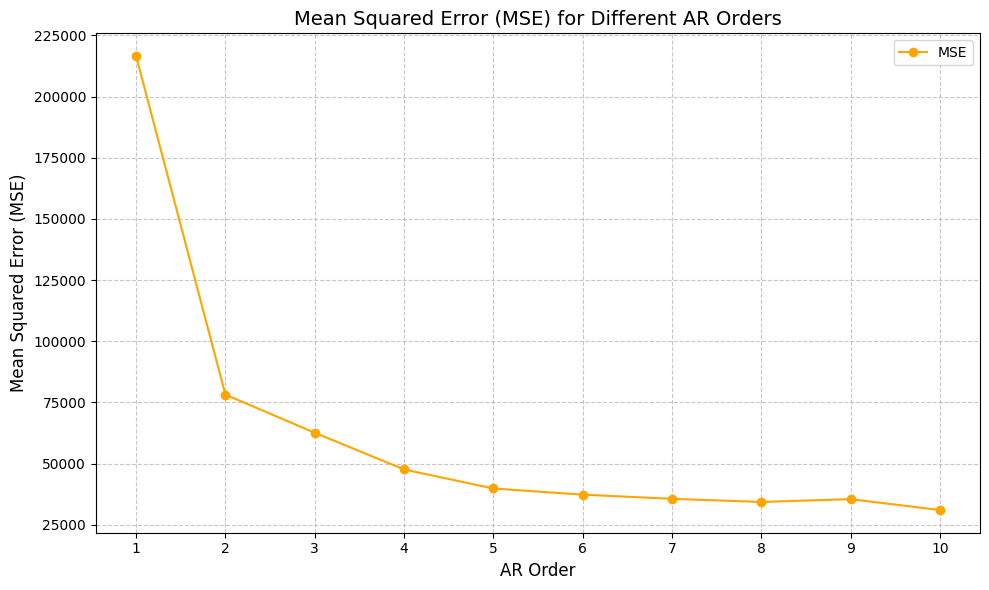

In [ ]:

# Data for MSE results
mse_results = {
    1: 216548.060933,
    2: 78186.843804,
    3: 62607.240334,
    4: 47615.77231,
    5: 39835.790127,
    6: 37318.81912,
    7: 35613.303095,
    8: 34333.780501,
    9: 35474.854775,
    10: 31036.167008,
}

# Convert to DataFrame for easier handling
mse_df = pd.DataFrame(list(mse_results.items()), columns=["AR Order", "MSE"])

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.plot(mse_df["AR Order"], mse_df["MSE"], marker='o', linestyle='-', color="orange", label="MSE")
plt.title("Mean Squared Error (MSE) for Different AR Orders", fontsize=14)
plt.xlabel("AR Order", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xticks(mse_df["AR Order"])
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

We see that the best Model has an AR about 10 but there are diminishing returns after 6, so for computational efficiency we use a AR of 6 for our ARIMA Model

Predict the new model with AR(6) and MA(1) .. only MA(1) because there was not a big difference between MA(1) and MA(2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                   SARIMAX Results                                   
Dep. Variable:     Tessin_speicherinhalt_gwh   No. Observations:                 1300
Model:                        ARIMA(6, 0, 1)   Log Likelihood               -6101.914
Date:                       Wed, 27 Nov 2024   AIC                          12221.827
Time:                               08:26:43   BIC                          12268.358
Sample:                           01-03-2000   HQIC                         12239.286
                                - 11-25-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.2712     17.210     38.132      0.000     622.540     690.003
ar.L1          2.4812      0.047     52.431      0.000       2.388       2.

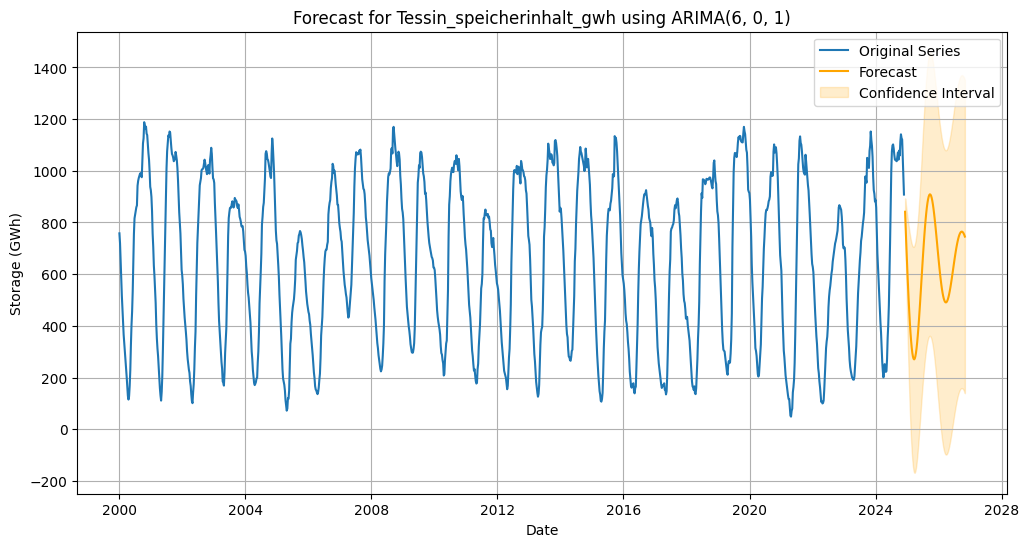

In [ ]:

# Fit ARIMA(6, 0, 1) model (AR(1), no differencing, no MA)
model = ARIMA(Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], order=(6, 0, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecasting
forecast_horizon = 100  # Forecast 100 steps ahead
forecast = model_fit.get_forecast(steps=forecast_horizon)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original series and forecast
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(Fuellstand_Tessin.index, Fuellstand_Tessin['Tessin_speicherinhalt_gwh'], label="Original Series")

# Plot forecast
forecast_index = pd.date_range(start=Fuellstand_Tessin.index[-1], periods=forecast_horizon + 1, freq="W")[1:]
plt.plot(forecast_index, forecast_values, color="orange", label="Forecast")

# Plot confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="orange", alpha=0.2, label="Confidence Interval")

# Add labels and legend
plt.title("Forecast for Tessin_speicherinhalt_gwh using ARIMA(6, 0, 1)")
plt.xlabel("Date")
plt.ylabel("Storage (GWh)")
plt.legend()
plt.grid()
plt.show()

The model performs better than AR(2) models...






Step 9
Check for the Residual Error it should have a lot of white noise and be random

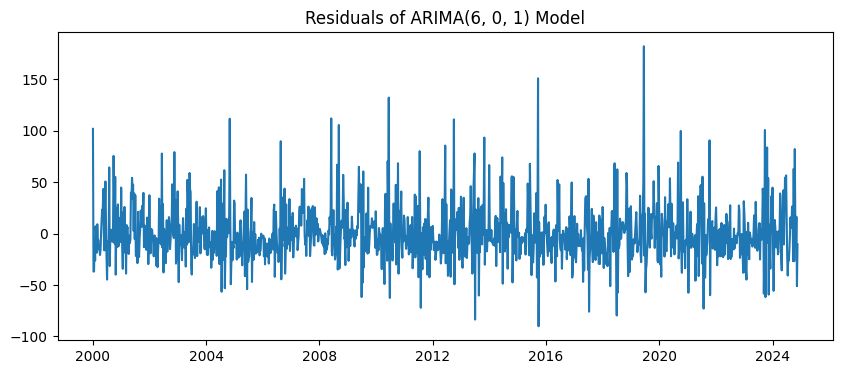

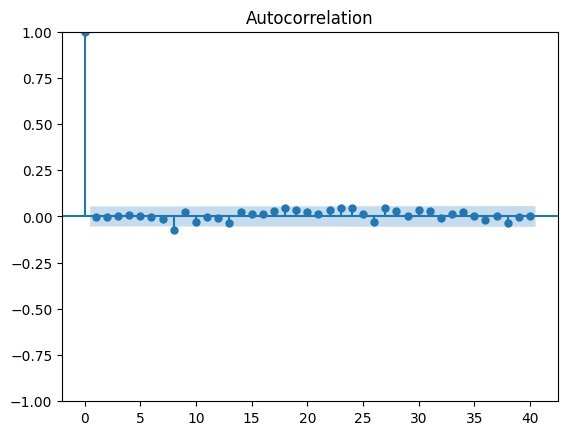

In [ ]:
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals of ARIMA(6, 0, 1) Model")
plt.show()

# Plot ACF of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()